In [109]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon

import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
census = gpd.read_file('./census/2020_Census_Block_Groups_in_Boston.shp')
census.head()

geoid20 countyfp20     namelsad20 statefp20     bgid tractce20  \
0  250250406001        025  Block Group 1        25  0406001    040600   
1  250250511011        025  Block Group 1        25  0511011    051101   
2  250250511014        025  Block Group 4        25  0511014    051101   
3  250259816001        025  Block Group 1        25  9816001    981600   
4  250250102043        025  Block Group 3        25  0102043    010204   

    intptlat20 funcstat20    intptlon20 blkgrpce20 mtfcc20  aland20  awater20  \
0  +42.3833695          S  -071.0707743          1   G5030  1265377    413598   
1  +42.3882285          S  -071.0046816          1   G5030   220626         0   
2  +42.3913407          S  -071.0020343          4   G5030   227071       270   
3  +42.3886205          S  -070.9934424          1   G5030   586981    158777   
4  +42.3459611          S  -071.1020344          3   G5030   145888         0   

   objectid                                           geometry  
0         1  POLYGON ((769378.692 2964626.314, 769385.078 2...  
1         2  POLYGON ((788317.786 2966115.262, 788838.563 2...  
2         3  POLYGON ((789538.125 2967889.427, 789539.214 2...  
3         4  POLYGON ((790938.417 2966482.117, 790974.619 2...  
4         5  POLYGON ((762928.668 2951612.031, 763063.607 2...

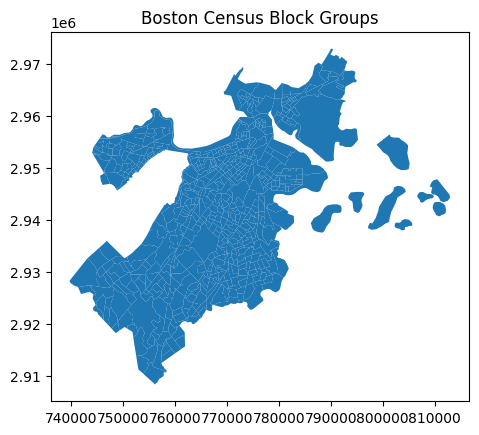

In [111]:
census.plot()
plt.title('Boston Census Block Groups')
plt.show()

In [112]:
gdata = pd.read_csv("./census-block-group-data.csv")
# gdata.rename(columns=)
cols = "field concept,State/US-Abbreviation (USPS),Summary Level,Geographic Record Identifier,Geographic Code Identifier,Region,Division,State (FIPS),County (FIPS),County Subdivision (FIPS),Census Tract,Block Group,GEOID 2020 block group,Total:,White alone,Black or African American alone,Hispanic or Latino,Asian alone,American Indian and Alaska Native alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Population of two or more races:,Total:,White alone,Black or African American alone,Hispanic or Latino,Asian alone,American Indian and Alaska Native alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Population of two or more races:,Total:,Institutionalized population:,Correctional facilities for adults,Juvenile facilities,Nursing facilities/Skilled-nursing facilities,Other institutional facilities,Noninstitutionalized population:,College/University student housing,Military quarters,Other noninstitutional facilities,Total:,Occupied,Vacant"\
        .split(",")
mapper = {old: new for old, new in zip(gdata.columns, cols)}
gdata.rename(columns=mapper, inplace=True)
gdata.head()

field concept State/US-Abbreviation (USPS)  Summary Level  \
0          PLST                           MA            150   
1          PLST                           MA            150   
2          PLST                           MA            150   
3          PLST                           MA            150   
4          PLST                           MA            150   

  Geographic Record Identifier  Geographic Code Identifier  Region  Division  \
0        1500000US250250001011                2.500000e+11       1         1   
1        1500000US250250001012                2.500000e+11       1         1   
2        1500000US250250001021                2.500000e+11       1         1   
3        1500000US250250001022                2.500000e+11       1         1   
4        1500000US250250002011                2.500000e+11       1         1   

   State (FIPS)  County (FIPS)  County Subdivision (FIPS)  ...  \
0            25             25                        NaN  ...   
1            25             25                        NaN  ...   
2            25             25                        NaN  ...   
3            25             25                        NaN  ...   
4            25             25                        NaN  ...   

   Juvenile facilities  Nursing facilities/Skilled-nursing facilities  \
0                    0                                              0   
1                    0                                              0   
2                    0                                              0   
3                    7                                              0   
4                    0                                              0   

   Other institutional facilities  Noninstitutionalized population:  \
0                               0                                 0   
1                               0                                10   
2                               0                                 4   
3                               0                                 6   
4                               0                                 0   

   College/University student housing  Military quarters  \
0                                   0                  0   
1                                   0                  0   
2                                   0                  0   
3                                   0                  0   
4                                   0                  0   

   Other noninstitutional facilities  Total:  Occupied  Vacant  
0                                  0     422       407      15  
1                                 10     304       290      14  
2                                  4     383       365      18  
3                                  6    1312      1241      71  
4                                  0     361       354       7  

[5 rows x 44 columns]

In [113]:
gdata["geoid20"] = gdata["Geographic Record Identifier"].str.split("US").apply(lambda x: x[1])
census_combined = census.merge(gdata, on="geoid20")
census_combined["Black or African American alone"]
census_unique = census_combined.loc[:,~census_combined.columns.duplicated()].copy() # make new dataframe with unique columns names
census_unique["Black or African American alone"]



0       78
1       39
2       41
3        0
4       32
      ... 
575    151
576    441
577     60
578     50
579    218
Name: Black or African American alone, Length: 580, dtype: int64

<Axes: >

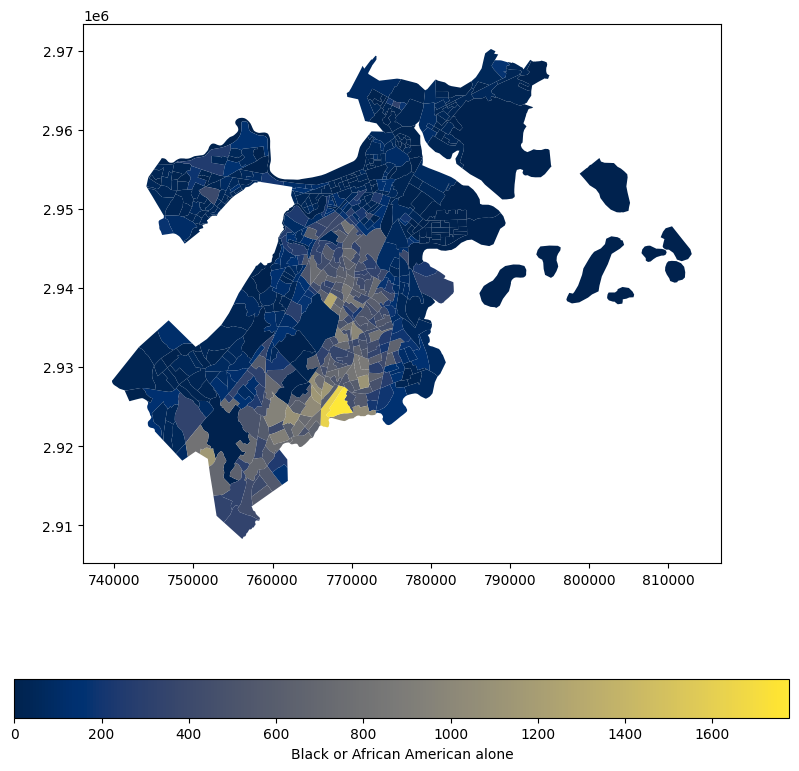

In [120]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
census_unique.plot(column="Black or African American alone", ax=ax, legend=True, cmap="cividis",\
                     legend_kwds={'label': "Black or African American alone",
                         'orientation': "horizontal"})

In [115]:
census_unique.columns

Index(['geoid20', 'countyfp20', 'namelsad20', 'statefp20', 'bgid', 'tractce20',
       'intptlat20', 'funcstat20', 'intptlon20', 'blkgrpce20', 'mtfcc20',
       'aland20', 'awater20', 'objectid', 'geometry', 'field concept',
       'State/US-Abbreviation (USPS)', 'Summary Level',
       'Geographic Record Identifier', 'Geographic Code Identifier', 'Region',
       'Division', 'State (FIPS)', 'County (FIPS)',
       'County Subdivision (FIPS)', 'Census Tract', 'Block Group',
       'GEOID 2020 block group', 'Total:', 'White alone',
       'Black or African American alone', 'Hispanic or Latino', 'Asian alone',
       'American Indian and Alaska Native alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some Other Race alone', 'Population of two or more races:',
       'Institutionalized population:', 'Correctional facilities for adults',
       'Juvenile facilities', 'Nursing facilities/Skilled-nursing facilities',
       'Other institutional facilities', 'Noninsti

In [116]:
total = 'Total:'
race_cols = [ 'White alone',
       'Black or African American alone', 'Hispanic or Latino', 'Asian alone',
       'American Indian and Alaska Native alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some Other Race alone', 'Population of two or more races:']
# normalize ? ratios or total numbers
n = len(race_cols)
n

8

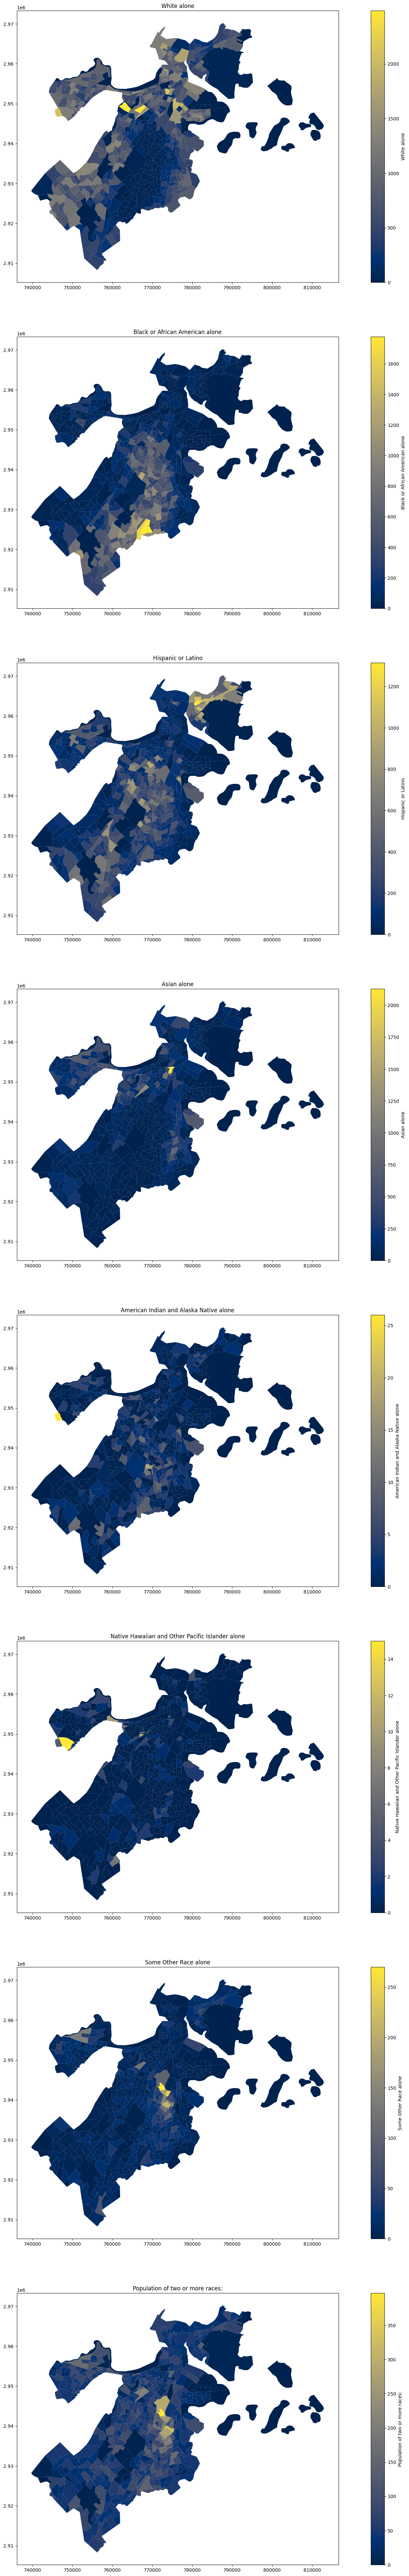

In [117]:
fig, axes = plt.subplots(n, 1, figsize=(25, 100))
for i, col in enumerate(race_cols):
    census_unique.plot(column=race_cols[i], ax=axes[i], legend=True, cmap="cividis",\
                     legend_kwds={'label': race_cols[i],
                         'orientation': "vertical"})
    axes[i].set_title(race_cols[i])

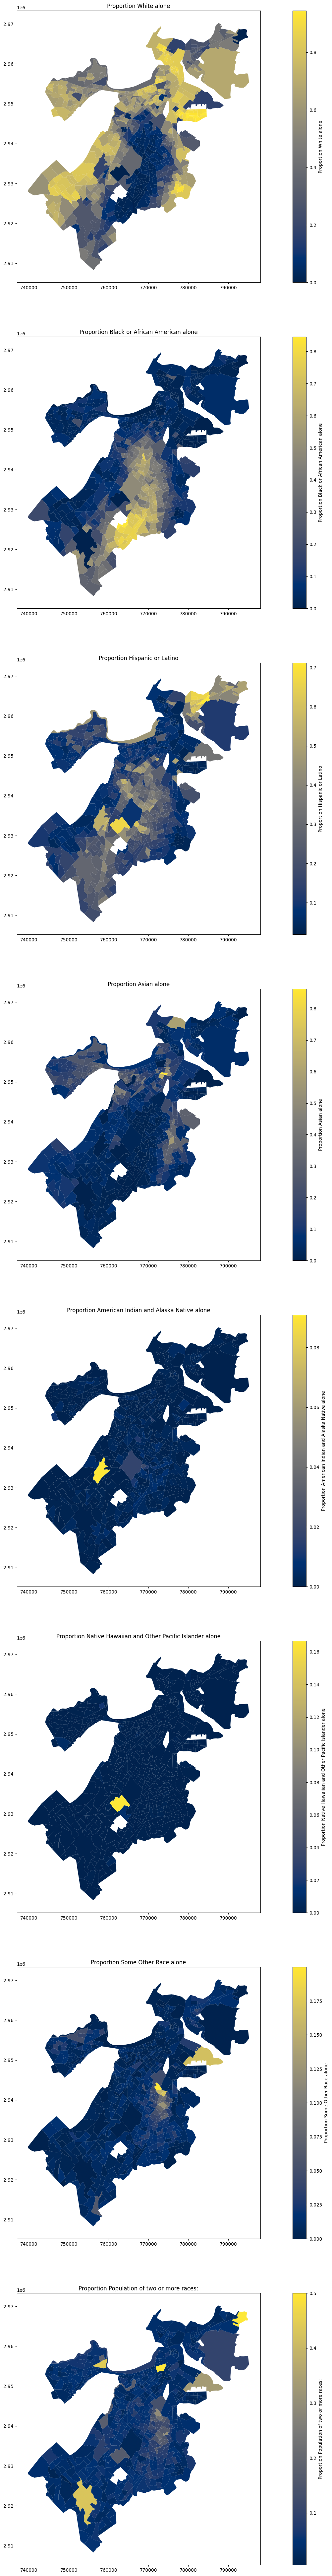

In [118]:
for i, col in enumerate(race_cols):
    census_unique[f"Proportion {col}"] = census_unique[col] / census_unique["Total:"]
normalized_rcols = [f"Proportion {col}" for col in race_cols]
fig, axes = plt.subplots(n, 1, figsize=(25, 100))
for i, col in enumerate(normalized_rcols):
    census_unique.plot(column=normalized_rcols[i], ax=axes[i], legend=True, cmap="cividis",\
                     legend_kwds={'label': normalized_rcols[i],
                         'orientation': "vertical"})
    axes[i].set_title(normalized_rcols[i])


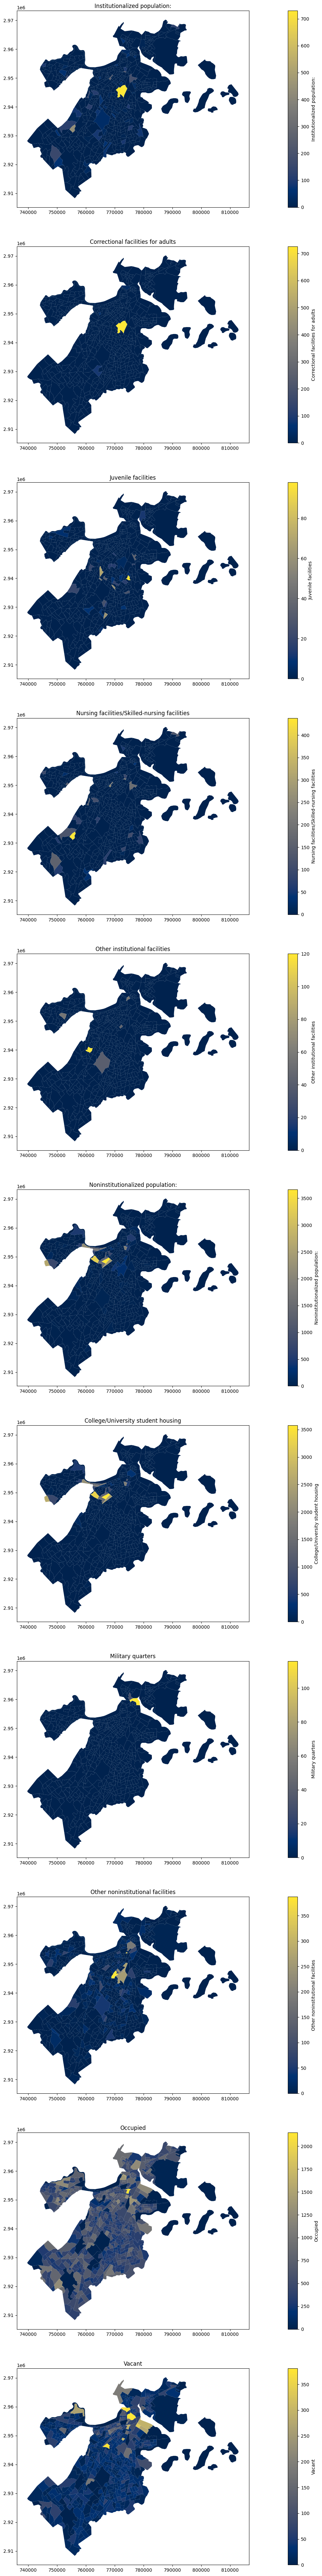

In [119]:
other_cols = ['Institutionalized population:', 'Correctional facilities for adults',
       'Juvenile facilities', 'Nursing facilities/Skilled-nursing facilities',
       'Other institutional facilities', 'Noninstitutionalized population:',
       'College/University student housing', 'Military quarters',
       'Other noninstitutional facilities', 'Occupied', 'Vacant']
k = len(other_cols)
fig, axes = plt.subplots(k, 1, figsize=(30, 100))
for i, col in enumerate(other_cols):
    census_unique.plot(column=other_cols[i], ax=axes[i], legend=True, cmap="cividis",\
                     legend_kwds={'label': other_cols[i],
                         'orientation': "vertical"})
    axes[i].set_title(other_cols[i])